In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                            'foo', 'bar', 'foo', 'foo'],
                   'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})


In [3]:
df

,A,B,C,D
0,foo,one,1.037398,-0.305965
1,bar,one,-0.008043,-0.827042
2,foo,two,0.655850,1.442295
3,bar,three,0.986236,0.043552
4,foo,two,0.784735,0.842874
5,bar,two,-1.197115,-1.727585
6,foo,one,-0.268740,0.503794
7,foo,three,-1.417431,-0.702449


In [4]:
df_grouped=df.groupby('A')

In [5]:
df_grouped #doesnt show anything because Python does not want to waste memory by storing same tables again and again

In [8]:
df.C.sum()

0.5728911729073891

In [9]:
df_grouped.C.sum()

A
bar   -0.218922
foo    0.791813
Name: C, dtype: float64

In [10]:
df.A.value_counts()

foo    5
bar    3
Name: A, dtype: int64

In [11]:
df_grouped.mean()

,C,D
A,,
bar,-0.072974,-0.837025
foo,0.158363,0.356110


In [12]:
df_grouped.C.mean()

A
bar   -0.072974
foo    0.158363
Name: C, dtype: float64

In [13]:
df_grouped.last()

,B,C,D
A,,,
bar,two,-1.197115,-1.727585
foo,three,-1.417431,-0.702449


In [14]:
df_grouped.first()

,B,C,D
A,,,
bar,one,-0.008043,-0.827042
foo,one,1.037398,-0.305965


In [15]:
df_grouped = df.groupby("A", as_index=False)  #want A to be a part instead of being the index

In [16]:
df_grouped.first() #can see new index

,A,B,C,D
0,bar,one,-0.008043,-0.827042
1,foo,one,1.037398,-0.305965


In [19]:
df_grouped = df.groupby(["A", "B"]) #group by 2 columns

In [20]:
df_grouped.mean()

C         D
A   B                        
bar one   -0.008043 -0.827042
    three  0.986236  0.043552
    two   -1.197115 -1.727585
foo one    0.384329  0.098914
    three -1.417431 -0.702449
    two    0.720292  1.142584

In [21]:
df_grouped = df.groupby("A")

In [22]:
df_grouped.groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [23]:
test= df_grouped.get_group('foo')

In [24]:
test

,A,B,C,D
0,foo,one,1.037398,-0.305965
2,foo,two,0.655850,1.442295
4,foo,two,0.784735,0.842874
6,foo,one,-0.268740,0.503794
7,foo,three,-1.417431,-0.702449


In [26]:
df_grouped.agg({'C': sum, 'D':np.mean})

,C,D
A,,
bar,-0.218922,-0.837025
foo,0.791813,0.356110


In [27]:
df_grouped.agg({'C':sum, 'D': np.mean}).rename(columns= {"C": "Sum_of_C", "D": "Mean_of_D"})

,Sum_of_C,Mean_of_D
A,,
bar,-0.218922,-0.837025
foo,0.791813,0.356110


In [28]:
df_grouped= df.groupby("A")

In [29]:
for group, data in df_grouped:
    print(group)
    print(data)

bar
     A      B         C         D
1  bar    one -0.008043 -0.827042
3  bar  three  0.986236  0.043552
5  bar    two -1.197115 -1.727585
foo
     A      B         C         D
0  foo    one  1.037398 -0.305965
2  foo    two  0.655850  1.442295
4  foo    two  0.784735  0.842874
6  foo    one -0.268740  0.503794
7  foo  three -1.417431 -0.702449


In [31]:
for group, data in df_grouped:
    print(group)
    print(data.C.mean())

bar
-0.07297392891786225
foo
0.15836259193219515


In [32]:
import seaborn as sns

In [33]:
titanic = sns.load_dataset('titanic')

In [34]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
#to calculate avg fare for female as compared to male

In [36]:
t_grouped = titanic. groupby("sex")

In [38]:
t_grouped.agg({'fare': np.mean})

,fare
sex,
female,44.479818
male,25.523893


In [39]:
t_grouped["fare", "age"].mean()

,fare,age
sex,,
female,44.479818,27.915709
male,25.523893,30.726645


In [40]:
##avg age of females who are alive

In [41]:
t_grouped= titanic.groupby(["sex", "alive"])

In [42]:
t_grouped.age.mean()

sex     alive
female  no       25.046875
        yes      28.847716
male    no       31.618056
        yes      27.276022
Name: age, dtype: float64

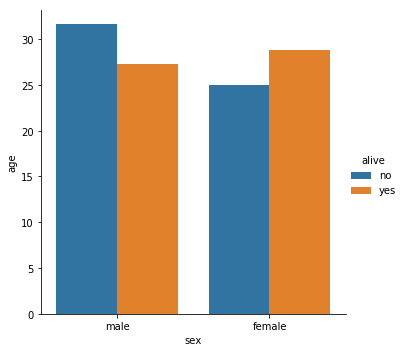

In [49]:
%matplotlib inline
sns.catplot(x="sex", y="age", data=titanic, kind="bar", hue="alive", ci=None)

In [50]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000018E9AE9FD90>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical distribution p